In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install lime

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=661ea92d4b72b105b557733b7c7b1caf9837c8005b35d29180d498dd7f254dbe
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
# Import necessary libraries
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the COVID-19 image dataset
dataset_path = '/content/drive/My Drive/Covid19-dataset'

# Define the ImageDataGenerator for train and test
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training set
training_set = train_datagen.flow_from_directory(dataset_path + '/train', target_size=(64, 64), batch_size=32, class_mode='categorical')

# Load the test set
test_set = test_datagen.flow_from_directory(dataset_path + '/test', target_size=(64, 64), batch_size=32, class_mode='categorical')

# Define a function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.  # rescale the same as when training
    return x

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [4]:
# Import necessary libraries
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the COVID-19 image dataset
dataset_path = '/content/drive/My Drive/Covid19-dataset'

# Define the ImageDataGenerator for train and test
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training set
training_set = train_datagen.flow_from_directory(dataset_path + '/train', target_size=(64, 64), batch_size=32, class_mode='categorical')

# Load the test set
test_set = test_datagen.flow_from_directory(dataset_path + '/test', target_size=(64, 64), batch_size=32, class_mode='categorical')

# Initialize the CNN
classifier = Sequential()

# Add the convolution layer
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Add the pooling layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Add the flattening layer
classifier.add(Flatten())

# Add the full connection layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=3, activation='softmax'))  # 3 units for 3 classes

# Compile the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the CNN to the images
classifier.fit(training_set, epochs=15, validation_data=test_set)



Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Epoch 1/15
8/8 [==============================] - 9s 956ms/step - loss: 1.2133 - accuracy: 0.3984 - val_loss: 0.9386 - val_accuracy: 0.7576
Epoch 2/15
8/8 [==============================] - 7s 840ms/step - loss: 0.8926 - accuracy: 0.6295 - val_loss: 0.7021 - val_accuracy: 0.8182
Epoch 3/15
8/8 [==============================] - 7s 823ms/step - loss: 0.6355 - accuracy: 0.7689 - val_loss: 0.4934 - val_accuracy: 0.8182
Epoch 4/15
8/8 [==============================] - 7s 790ms/step - loss: 0.5228 - accuracy: 0.7610 - val_loss: 1.0050 - val_accuracy: 0.5455
Epoch 5/15
8/8 [==============================] - 7s 832ms/step - loss: 0.5806 - accuracy: 0.7689 - val_loss: 0.3746 - val_accuracy: 0.8485
Epoch 6/15
8/8 [==============================] - 7s 950ms/step - loss: 0.5262 - accuracy: 0.8008 - val_loss: 0.5169 - val_accuracy: 0.6970
Epoch 7/15
8/8 [==============================] - 7s 836ms/step - loss: 0.4547 

In [5]:
classifier.save('/content/drive/My Drive/covid2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
import tensorflow as tf
classifier = tf.keras.models.load_model('/content/drive/My Drive/covid2.h5')

1/1 [==============================] - 0s 20ms/step
Image 1:
Predicted class: Covid
Class probabilities:
Covid: 98.08%
Normal: 1.66%
Viral Pneumonia: 0.26%


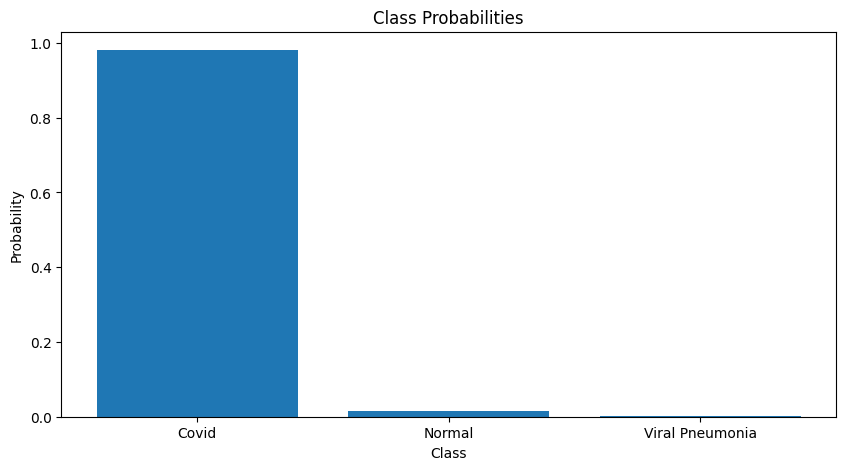

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


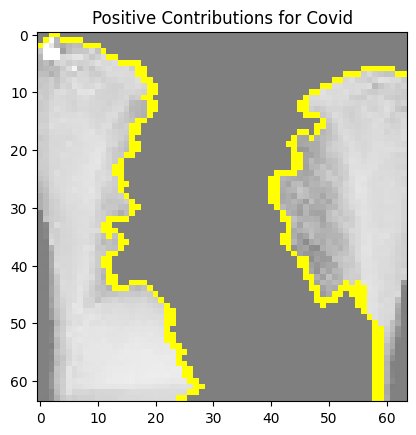

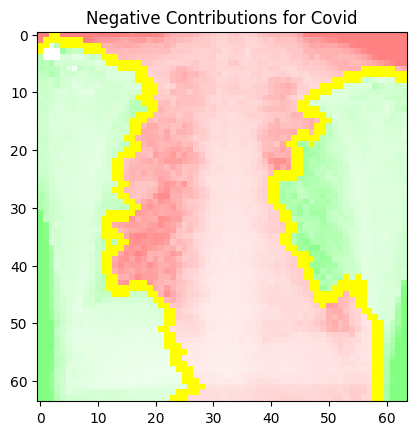

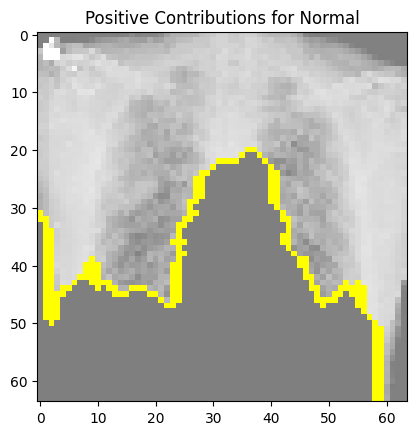

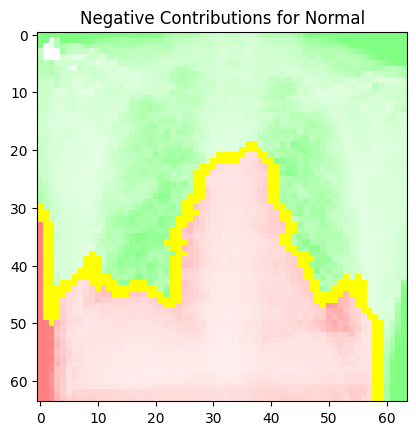

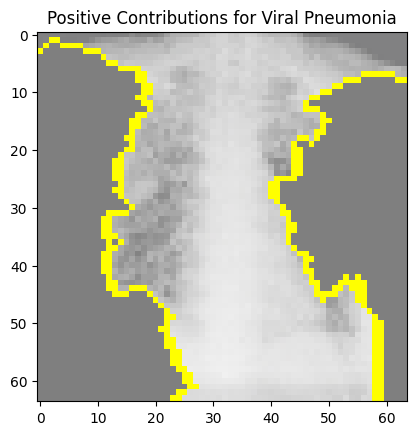

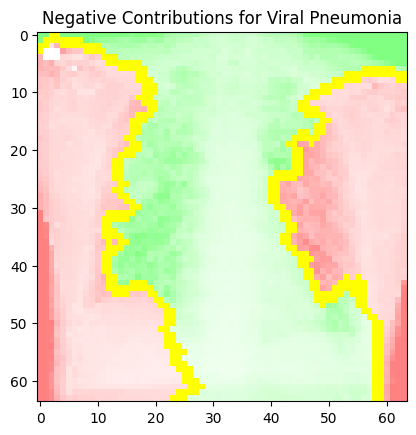

1/1 [==============================] - 0s 18ms/step
Image 2:
Predicted class: Covid
Class probabilities:
Covid: 98.47%
Normal: 1.44%
Viral Pneumonia: 0.09%


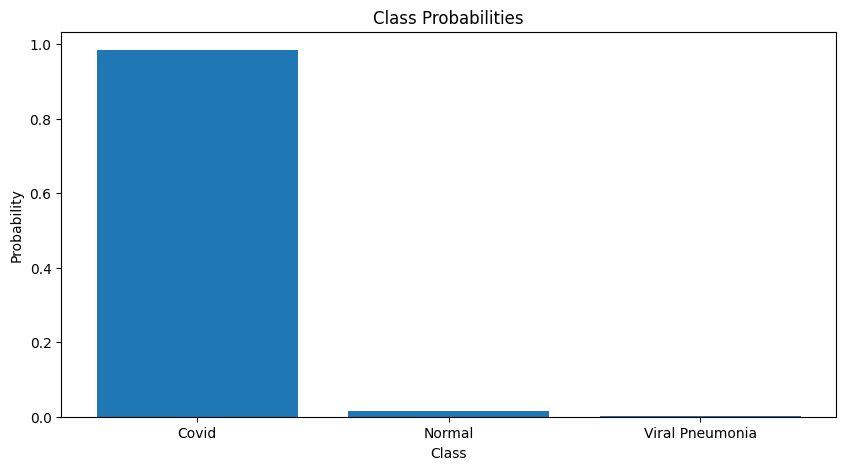

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


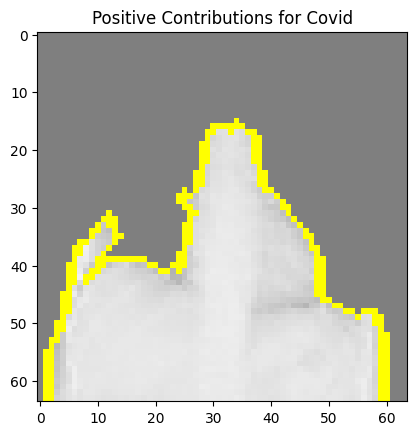

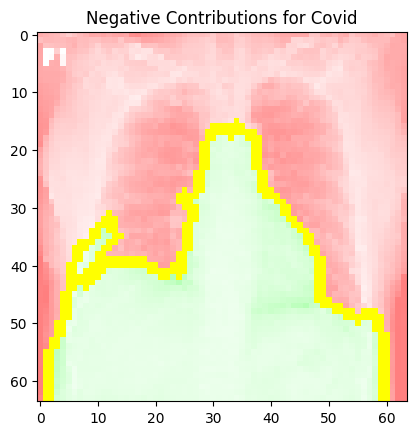

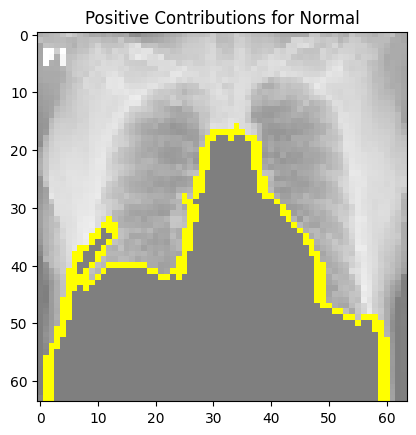

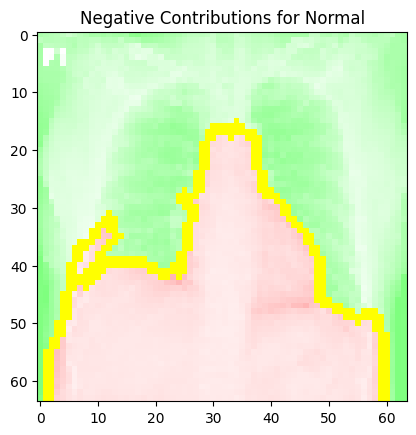

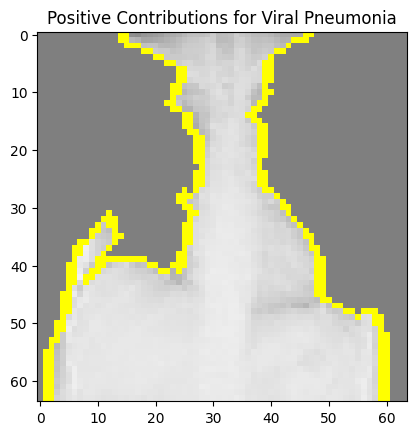

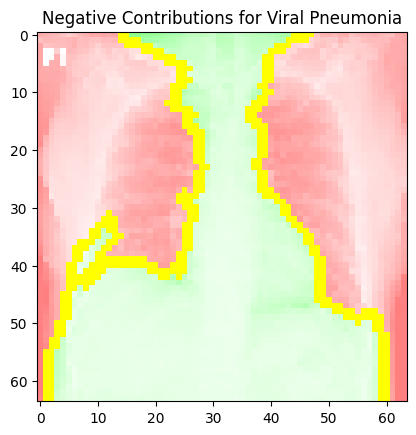

1/1 [==============================] - 0s 21ms/step
Image 3:
Predicted class: Covid
Class probabilities:
Covid: 76.21%
Normal: 20.51%
Viral Pneumonia: 3.28%


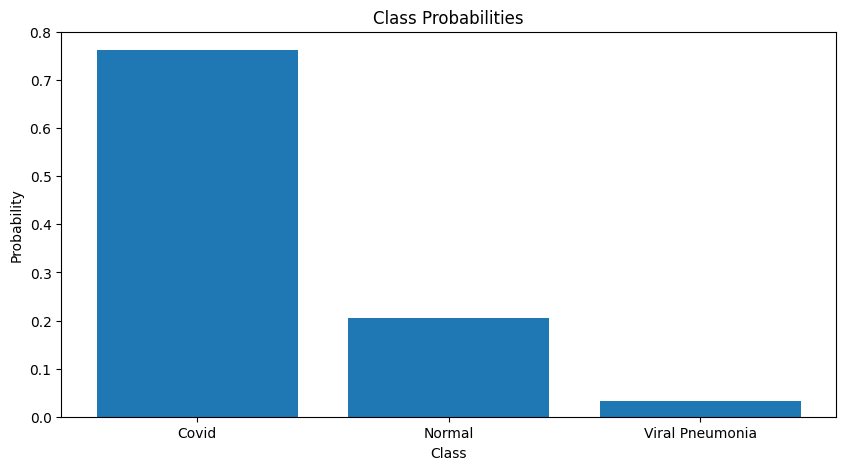

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


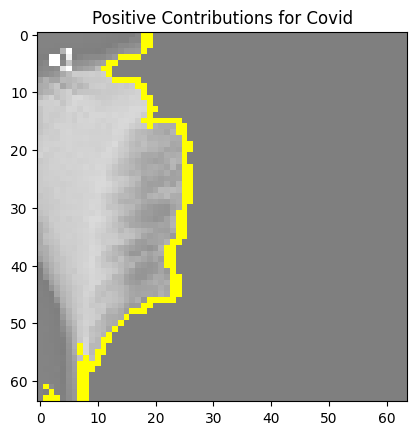

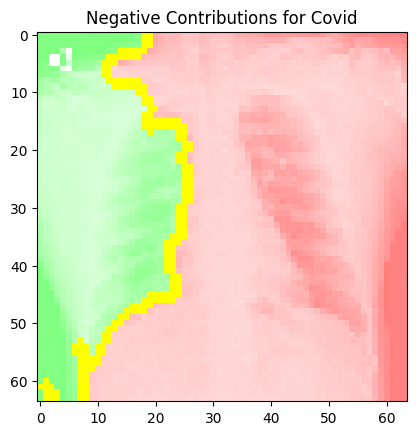

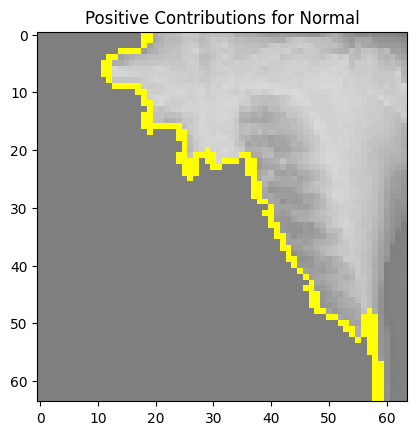

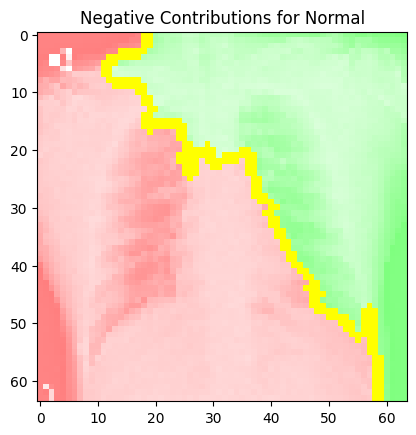

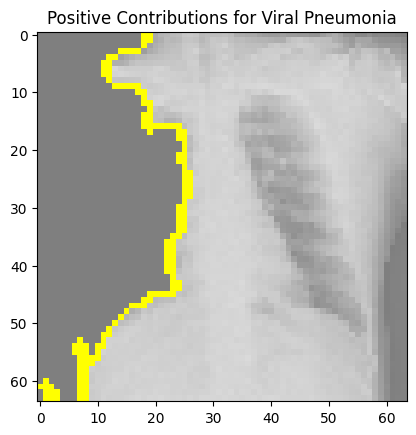

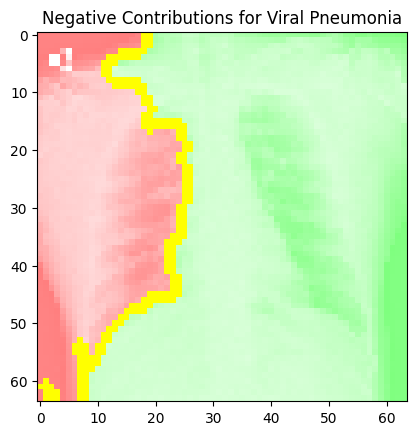

In [31]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.  # rescale the same as when training
    return x

# Define class names
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

# Loop over the first 5 images in the test dataset
for i in range(3):
    # Select an example image from the test dataset
    img_path = test_set.filepaths[i+11]

    # Preprocess the selected image
    processed_image = preprocess_image(img_path)

    # Make predictions using the model
    predictions = classifier.predict(processed_image)

    # Print the prediction labels and probabilities
    print(f'Image {i+1}:')
    print(f'Predicted class: {class_names[np.argmax(predictions)]}')
    print('Class probabilities:')
    for j in range(3):
        print(f'{class_names[j]}: {predictions[0][j]*100:.2f}%')

    # Plot the class probabilities
    plt.figure(figsize=(10, 5))
    plt.bar(class_names, predictions[0])
    plt.title('Class Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()

    # Explain the model's predictions for the selected image
    explanation = explainer.explain_instance(processed_image[0], classifier.predict, top_labels=3, hide_color=0, num_samples=2000)

    # Loop over all classes
    for class_index, class_name in enumerate(class_names):
        # Get the image and mask for the positive contributions of the current class
        temp, mask = explanation.get_image_and_mask(class_index, positive_only=True, num_features=10, hide_rest=True)

        # Display the LIME explanation
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.title(f'Positive Contributions for {class_name}')
        plt.show()

        # Get the image and mask for the negative contributions of the current class
        temp, mask = explanation.get_image_and_mask(class_index, positive_only=False, num_features=10, hide_rest=True)

        # Display the LIME explanation
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.title(f'Negative Contributions for {class_name}')
        plt.show()


 a superpixel refers to a group of pixels in an image that share some common characteristic (like color or texture). The model assigns weights to these superpixels based on their importance in determining the class of the image.

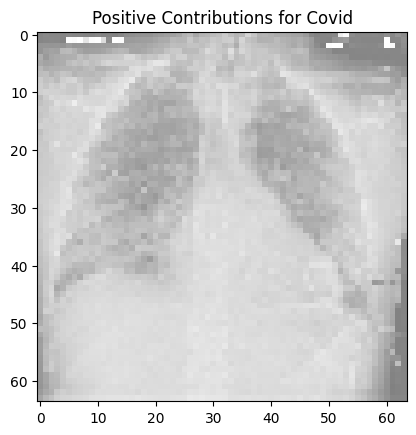

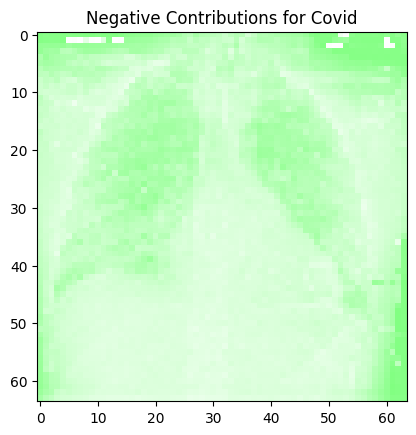

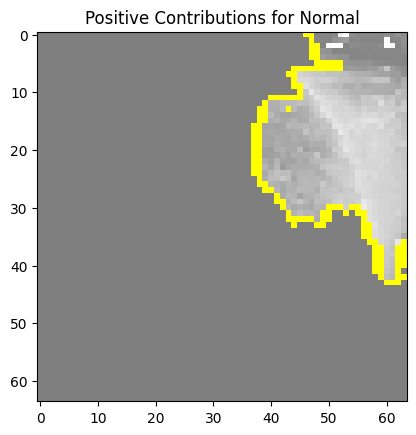

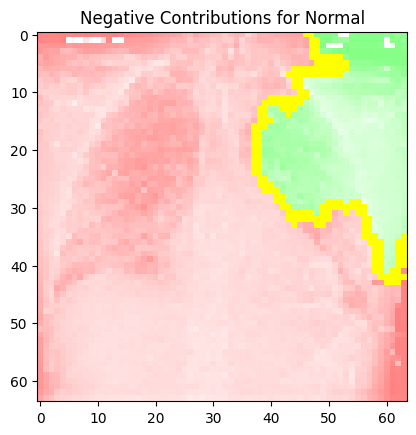

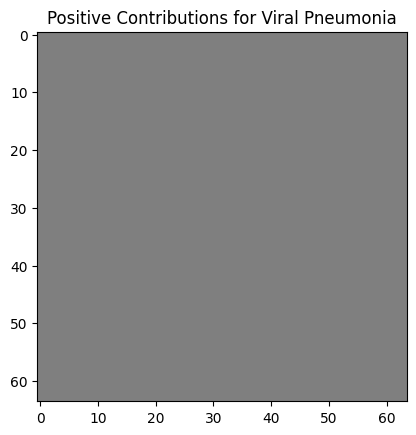

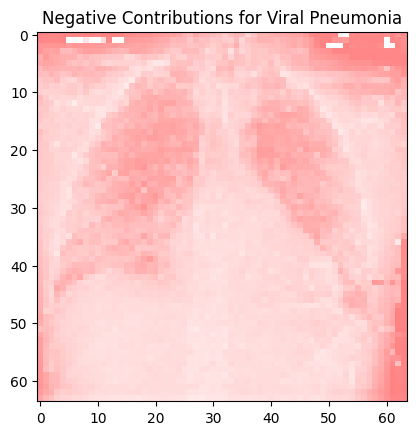

Feature weights for Covid:
Superpixel 3: Weight 0.14046449914635153
Superpixel 2: Weight 0.09654186991138099
Superpixel 1: Weight 0.09446259193578102
Superpixel 0: Weight 0.0031240459213211515
Feature weights for Normal:
Superpixel 2: Weight -0.09106167159658433
Superpixel 3: Weight -0.07063211581935996
Superpixel 1: Weight 0.00405853705923011
Superpixel 0: Weight -2.691643705735408e-05
Feature weights for Viral Pneumonia:
Superpixel 1: Weight -0.09852115052977324
Superpixel 3: Weight -0.06983240138950812
Superpixel 2: Weight -0.005480220408855666
Superpixel 0: Weight -0.0030971062790175106


In [ ]:
# Loop over all classes
for class_index, class_name in enumerate(class_names):
    # Get the image and mask for the positive contributions of the current class
    temp, mask = explanation.get_image_and_mask(class_index, positive_only=True, num_features=10, hide_rest=True)

    # Display the LIME explanation
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Positive Contributions for {class_name}')
    plt.show()

    # Get the image and mask for the negative contributions of the current class
    temp, mask = explanation.get_image_and_mask(class_index, positive_only=False, num_features=10, hide_rest=True)

    # Display the LIME explanation
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Negative Contributions for {class_name}')
    plt.show()
# Get the explanation data for each class
for class_index, class_name in enumerate(class_names):
    image, mask = explanation.get_image_and_mask(label=class_index)

    # Get the feature weights
    feature_weights = explanation.local_exp[class_index]

    # Print the feature weights
    print(f'Feature weights for {class_name}:')
    for superpixel, weight in feature_weights:
        print(f'Superpixel {superpixel}: Weight {weight}')


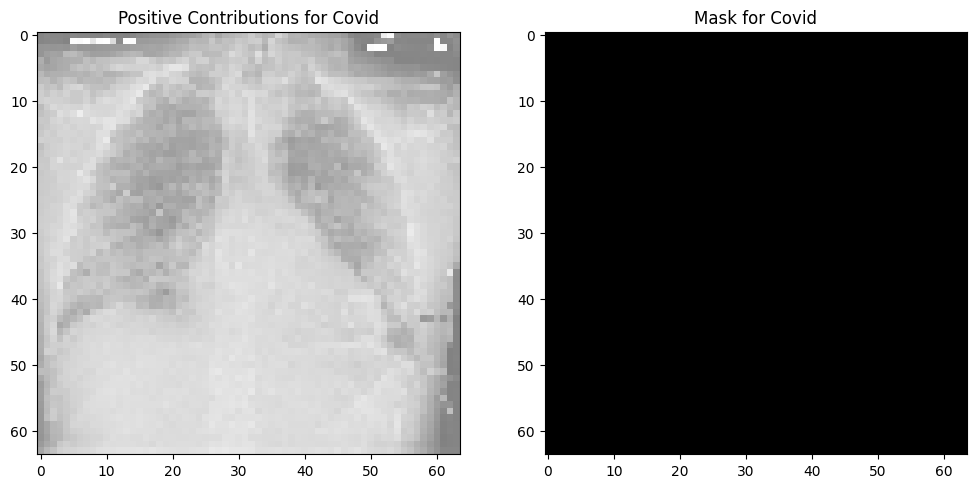

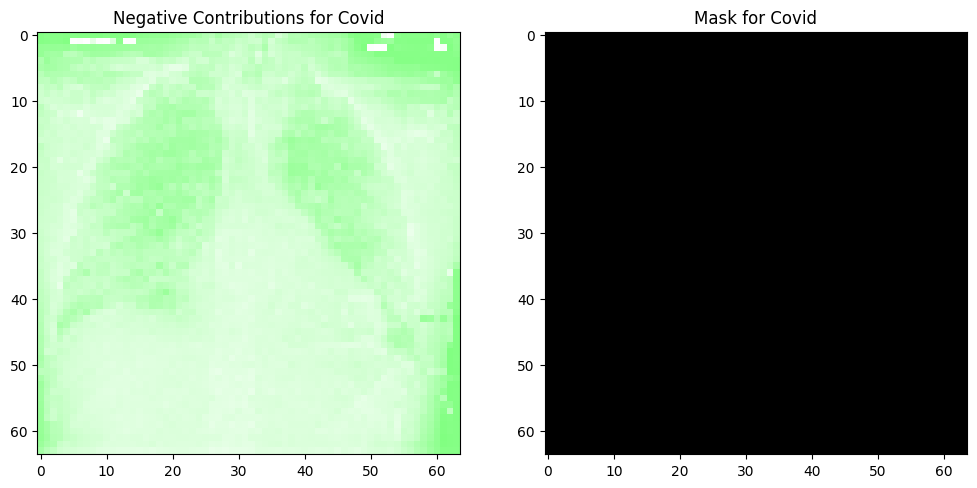

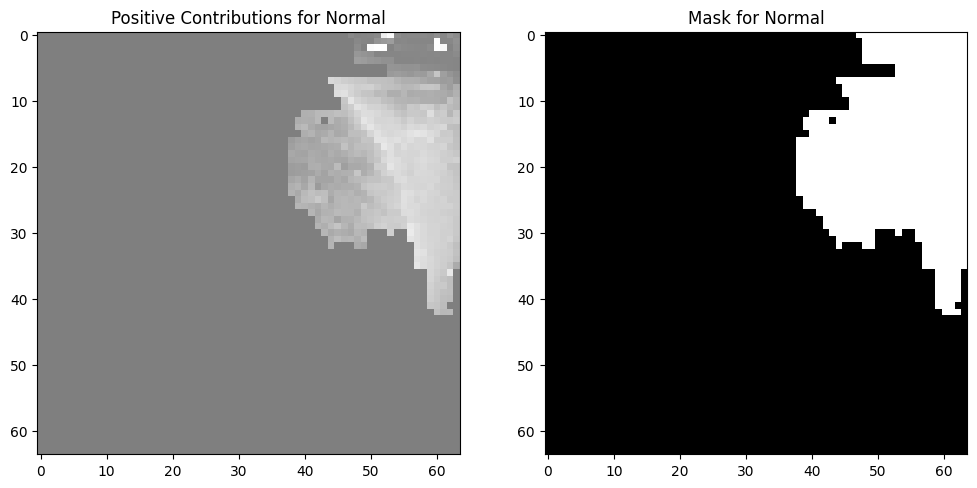

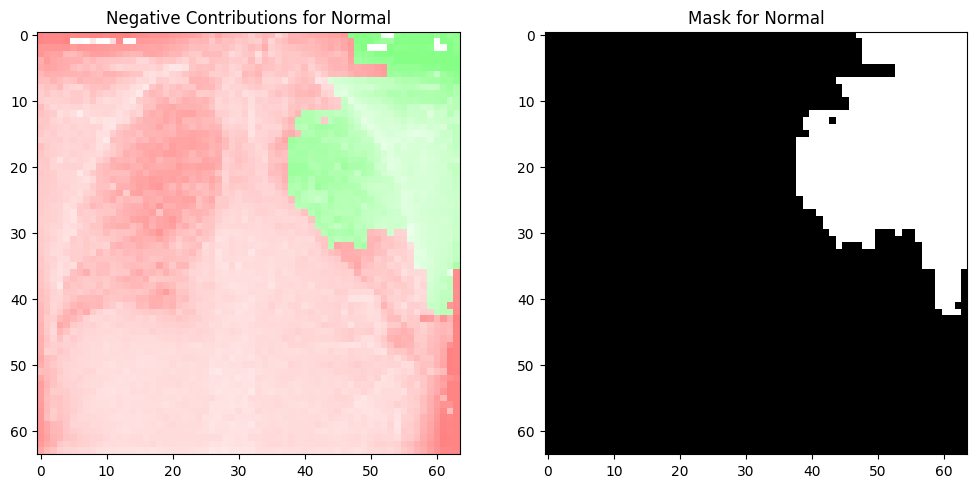

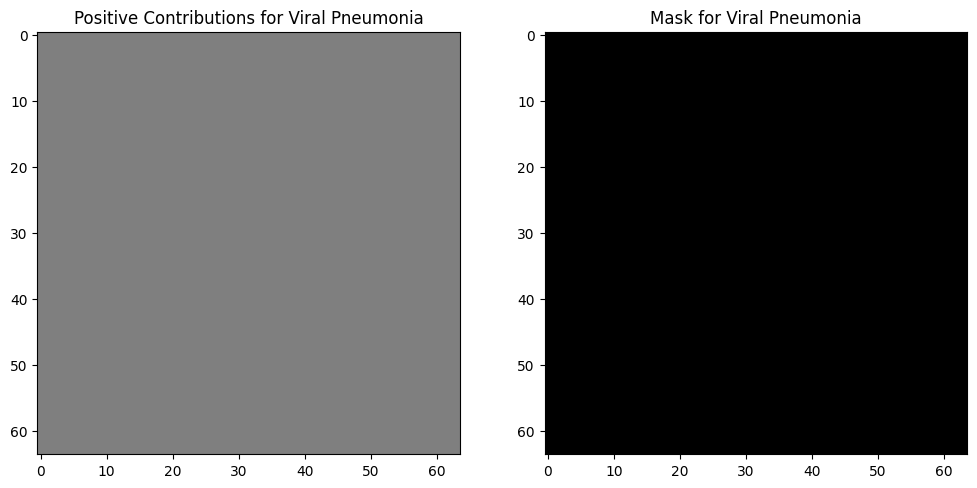

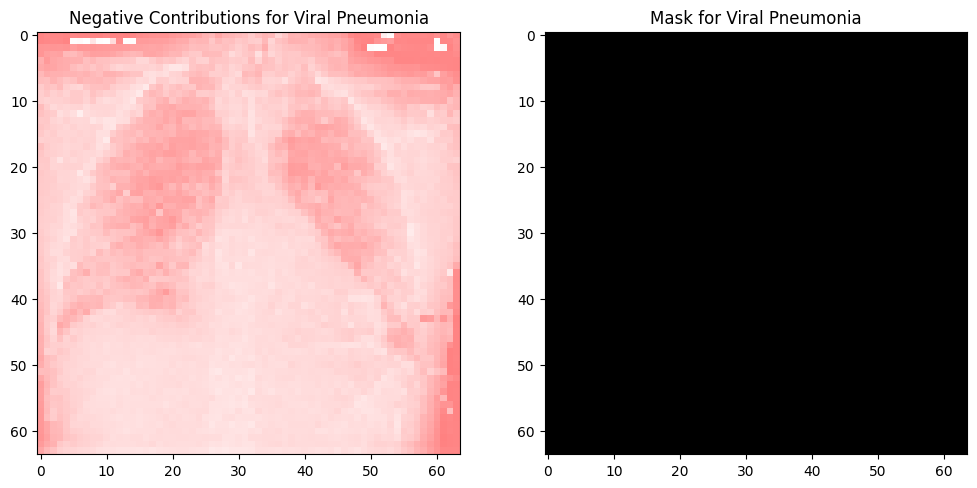

In [ ]:
# Loop over all classes
for class_index, class_name in enumerate(class_names):
    # Get the image and mask for the positive contributions of the current class
    temp, mask = explanation.get_image_and_mask(class_index, positive_only=True, num_features=10, hide_rest=True)

    # Display the LIME explanation along with the mask
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(temp / 2 + 0.5)
    ax[0].set_title(f'Positive Contributions for {class_name}')
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title(f'Mask for {class_name}')
    plt.show()

    # Get the image and mask for the negative contributions of the current class
    temp, mask = explanation.get_image_and_mask(class_index, positive_only=False, num_features=10, hide_rest=True)

    # Display the LIME explanation along with the mask
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(temp / 2 + 0.5)
    ax[0].set_title(f'Negative Contributions for {class_name}')
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title(f'Mask for {class_name}')
    plt.show()


# **SHAP**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


1/1 [==============================] - 0s 18ms/step
Image 1:
Predicted class: Covid
Class probabilities:
Covid: 96.35%
Normal: 2.07%
Viral Pneumonia: 1.58%


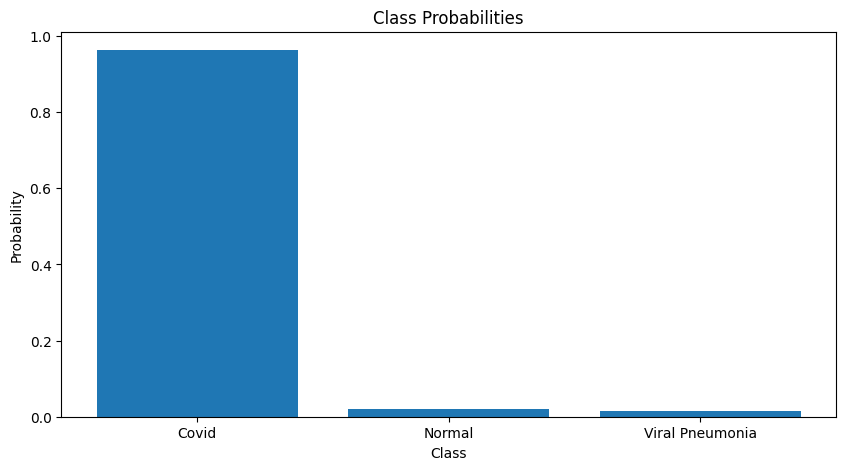

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


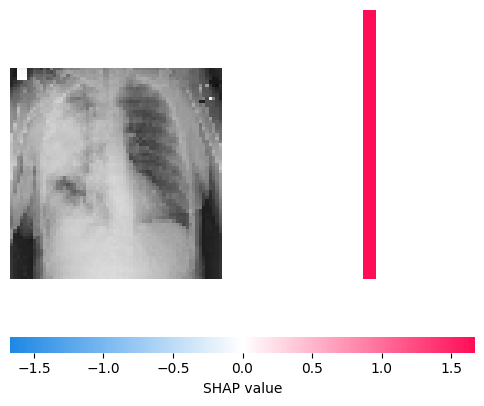

1/1 [==============================] - 0s 17ms/step
Image 2:
Predicted class: Covid
Class probabilities:
Covid: 99.68%
Normal: 0.28%
Viral Pneumonia: 0.03%


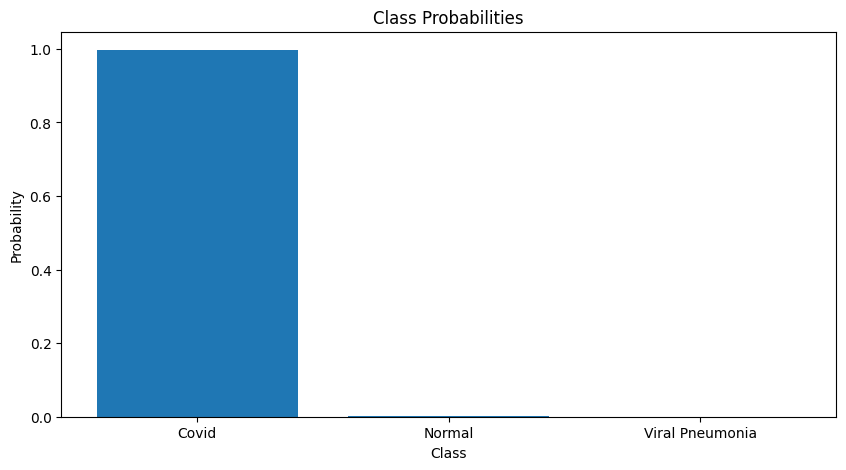

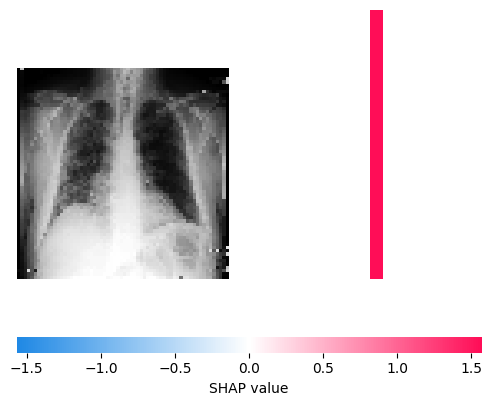

1/1 [==============================] - 0s 18ms/step
Image 3:
Predicted class: Normal
Class probabilities:
Covid: 27.81%
Normal: 67.81%
Viral Pneumonia: 4.38%


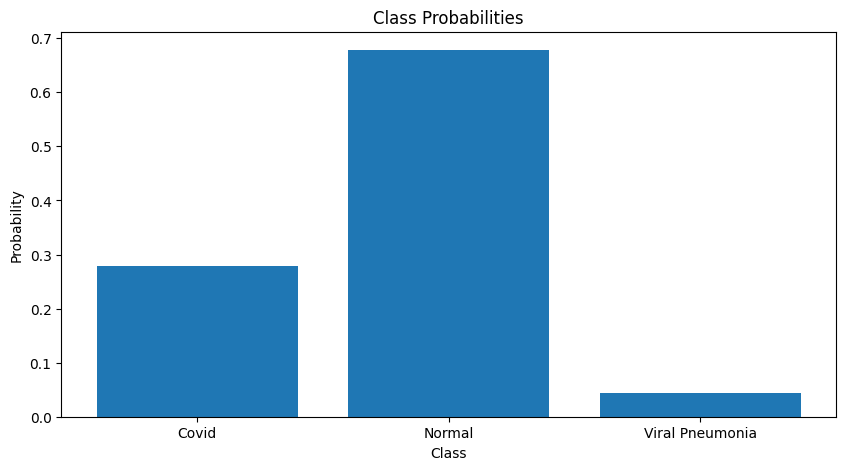

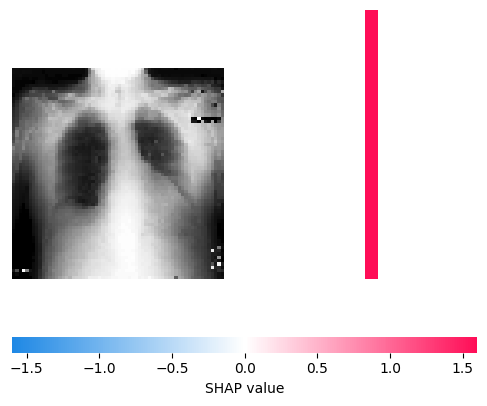

In [8]:
!pip install shap
import shap
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Define class names
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

# Get a sample of the training data
background = next(training_set)[0]

# Initialize the explainer
explainer = shap.DeepExplainer(classifier, background)

# Define a function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.  # rescale the same as when training
    return x

# Loop over the first 5 images in the test dataset
for i in range(3):
    # Select an example image from the test dataset
    img_path = test_set.filepaths[i+7]

    # Preprocess the selected image
    processed_image = preprocess_image(img_path)

    # Make predictions using the model
    predictions = classifier.predict(processed_image)

    # Print the prediction labels and probabilities
    print(f'Image {i+1}:')
    print(f'Predicted class: {class_names[np.argmax(predictions)]}')
    print('Class probabilities:')
    for j in range(3):
        print(f'{class_names[j]}: {predictions[0][j]*100:.2f}%')

    # Plot the class probabilities
    plt.figure(figsize=(10, 5))
    plt.bar(class_names, predictions[0])
    plt.title('Class Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()

    # Compute SHAP values
    shap_values = explainer.shap_values(processed_image)

    # Normalize SHAP values to the range [0,1]
    shap_values = [(shap_val - np.min(shap_val))/(np.max(shap_val) - np.min(shap_val)) for shap_val in shap_values]

    # Plot the SHAP values
    shap.image_plot(shap_values, processed_image)


# **Guided GRADCAM**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the path to the COVID-19 image dataset
dataset_path = '/content/drive/My Drive/Covid19-dataset'

# Use ImageDataGenerator to preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(dataset_path + '/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

# Train the model
model.fit(training_set, epochs=10)


58889256/58889256 [==============================] - 3s 0us/step


Found 251 images belonging to 3 classes.
Epoch 1/10
8/8 [==============================] - 32s 3s/step - loss: 5.6319 - accuracy: 0.6056
Epoch 2/10
8/8 [==============================] - 17s 2s/step - loss: 1.1191 - accuracy: 0.7888
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.7561 - accuracy: 0.8486
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.2746 - accuracy: 0.9203
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.1535 - accuracy: 0.9602
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.0726 - accuracy: 0.9761
Epoch 7/10
8/8 [==============================] - 8s 990ms/step - loss: 0.0701 - accuracy: 0.9721
Epoch 8/10
8/8 [==============================] - 9s 1s/step - loss: 0.0966 - accuracy: 0.9602
Epoch 9/10
8/8 [==============================] - 12s 2s/step - loss: 0.0762 - accuracy: 0.9841
Epoch 10/10
8/8 [==============================] - 8s 1s/step - loss: 0.0251 - accuracy: 0.9880


In [10]:
model.save('/content/drive/My Drive/covid.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/My Drive/covid.h5')

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the path to the COVID-19 image dataset
dataset_path = '/content/drive/My Drive/Covid19-dataset'

# Use ImageDataGenerator to preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(dataset_path + '/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(dataset_path + '/test',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


1/1 [==============================] - 2s 2s/step


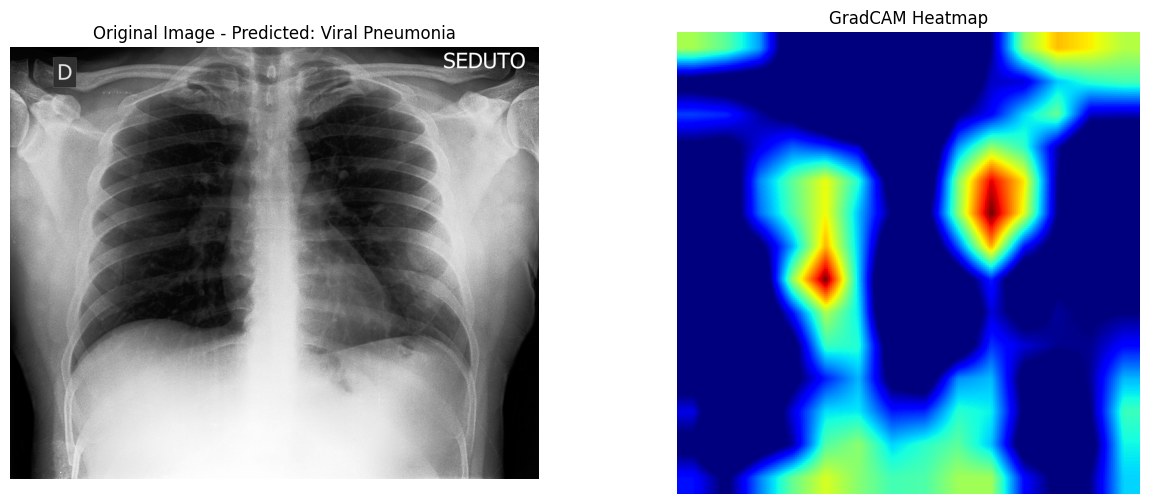

1/1 [==============================] - 0s 39ms/step


<ipython-input-13-f001fd9b3f28>:31: RuntimeWarning: invalid value encountered in divide
  heatmap = cam / np.max(cam)


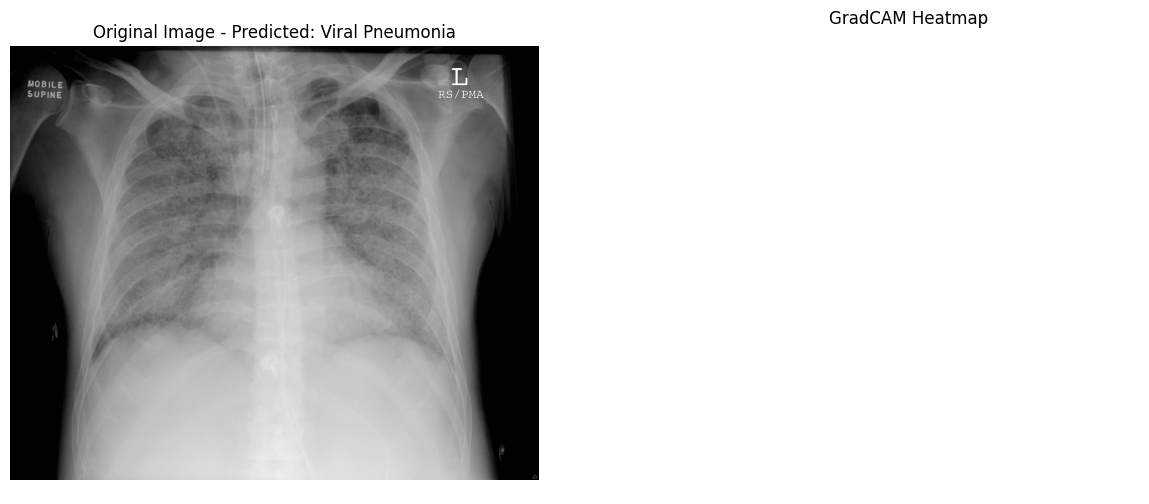

1/1 [==============================] - 0s 86ms/step


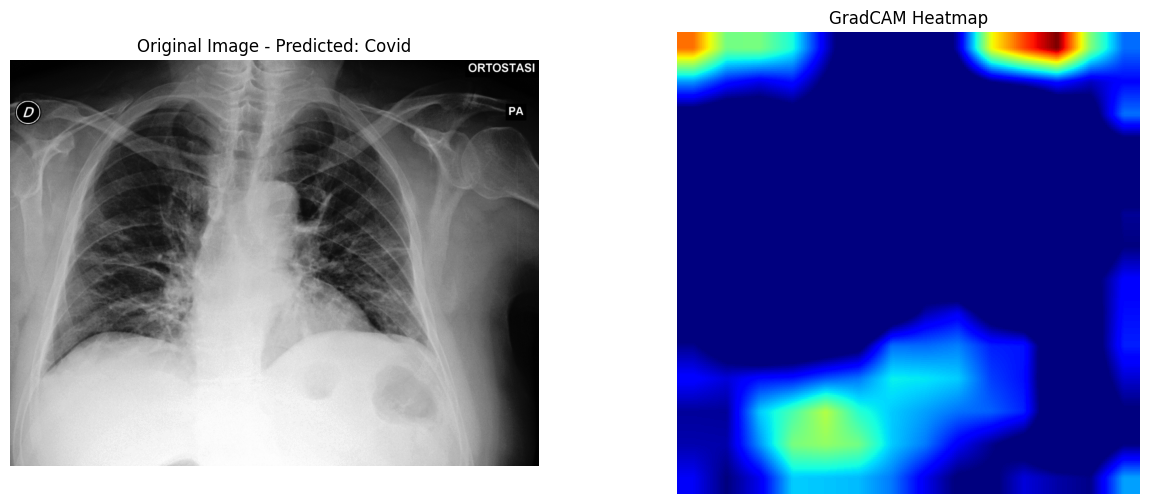

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

def grad_cam(input_model, image, cls, last_conv_layer_name):
    last_conv_layer = input_model.get_layer(last_conv_layer_name)
    iterate = tf.keras.models.Model([input_model.inputs], [input_model.output, last_conv_layer.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(image, tf.float32)
        tape.watch(inputs)
        predictions, conv_outputs = iterate(inputs)
        y_c = predictions[:, cls]

    grads = tape.gradient(y_c, conv_outputs)

    output, grads_val = conv_outputs[0], grads[0]

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    return heatmap

# Define class names
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

# Loop over the first 5 images in the test dataset
for i in range(3):
    # Select an example image from the test dataset
    img_path = training_set.filepaths[i+5]

    # Preprocess the selected image for VGG16
    processed_image = image.load_img(img_path, target_size=(224, 224))
    processed_image = image.img_to_array(processed_image)
    processed_image = np.expand_dims(processed_image, axis=0)
    processed_image = preprocess_input(processed_image)

    # Get the model's predictions
    preds = model.predict(processed_image)
    class_idx = np.argmax(preds[0])

    # Get the GradCAM heatmap
    gradcam_heatmap = grad_cam(model, processed_image, class_idx, 'block5_conv3')

    # Plot the original image, predicted class label, probability, and the GradCAM heatmap
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f'Original Image - Predicted: {class_names[class_idx]}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_heatmap, cmap='jet')
    plt.title('GradCAM Heatmap')
    plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 18ms/step


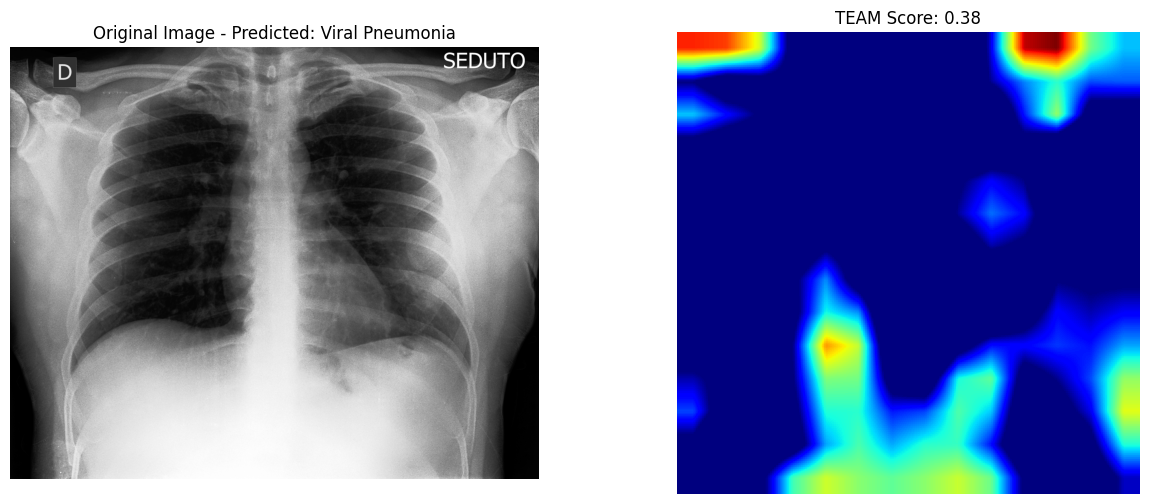

1/1 [==============================] - 0s 18ms/step


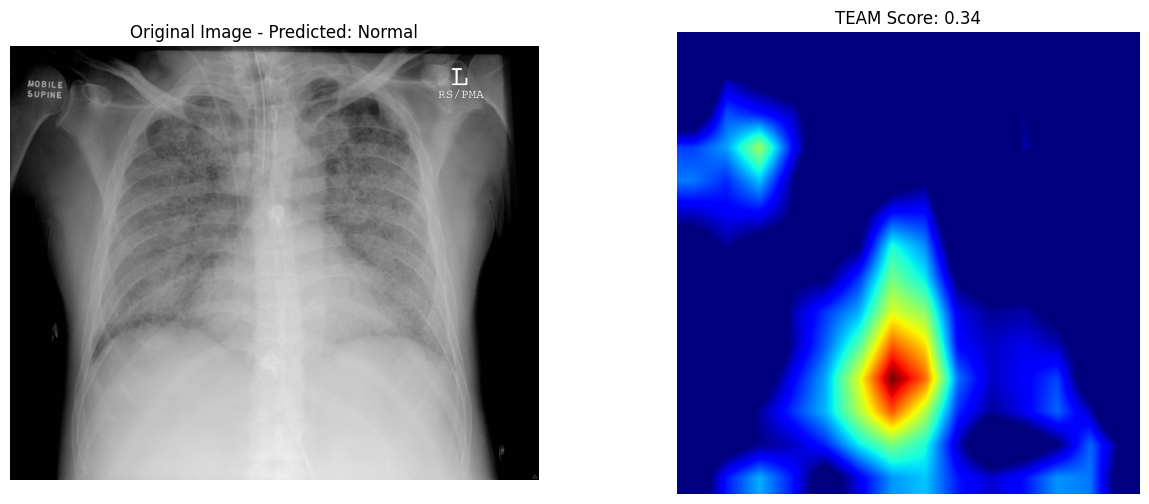

1/1 [==============================] - 0s 18ms/step


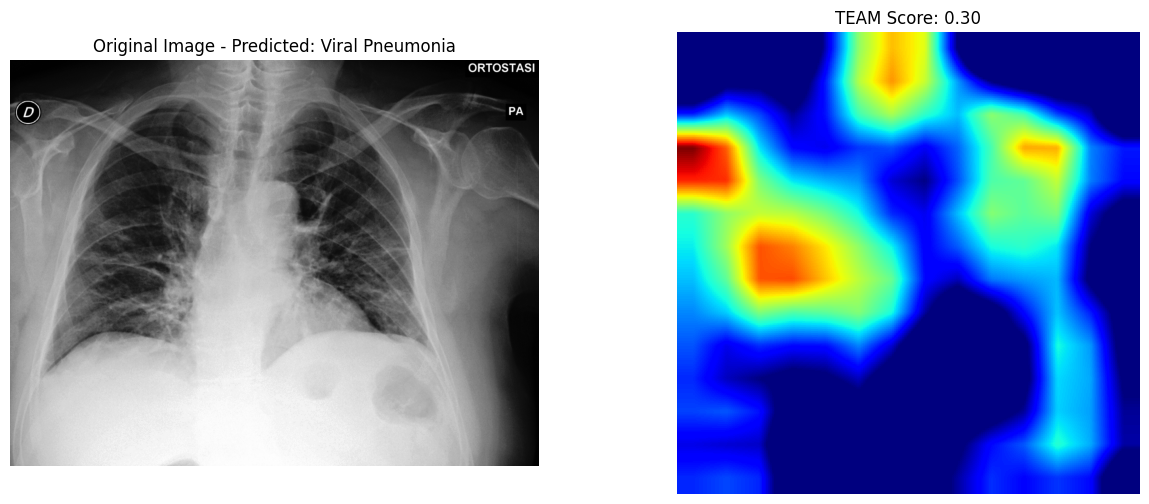

In [ ]:
def calculate_team(heatmap, predicted_class_prob):
    # Define weights for impression and confidence
    impression_weight = 0.7
    confidence_weight = 0.3

    # Calculate impression score (higher is better)
    # In practice, you might obtain this score from human annotators
    impression_score = obtain_impression_score(heatmap)

    # Calculate TEAM score
    team_score = (impression_weight * impression_score) + (confidence_weight * predicted_class_prob)

    return team_score

def obtain_impression_score(heatmap):
    # In practice, obtain impression score from human annotators
    # Here, let's assume a random score between 0 and 1 for demonstration purposes
    return np.random.uniform(0, 1)

# Loop over the first 5 images in the test dataset
for i in range(3):
    # Select an example image from the test dataset
    img_path = training_set.filepaths[i+5]

    # Preprocess the selected image for VGG16
    processed_image = image.load_img(img_path, target_size=(224, 224))
    processed_image = image.img_to_array(processed_image)
    processed_image = np.expand_dims(processed_image, axis=0)
    processed_image = preprocess_input(processed_image)

    # Get the model's predictions
    preds = model.predict(processed_image)
    class_idx = np.argmax(preds[0])

    # Get the GradCAM heatmap
    gradcam_heatmap = grad_cam(model, processed_image, class_idx, 'block5_conv3')

    # Calculate confidence value (probability of predicted class)
    confidence_value = preds[0][class_idx]

    # Calculate TEAM score
    team_score = calculate_team(gradcam_heatmap, confidence_value)

    # Plot the original image, predicted class label, probability, and the GradCAM heatmap
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f'Original Image - Predicted: {class_names[class_idx]}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_heatmap, cmap='jet')
    plt.title(f'TEAM Score: {team_score:.2f}')
    plt.axis('off')

    plt.show()


1/1 [==============================] - 0s 18ms/step
Image 1:
Predicted class: Normal
Class probabilities:
Covid: 0.00%
Normal: 100.00%
Viral Pneumonia: 0.00%
Impression Score: 0.41
Confidence Value: 1.00


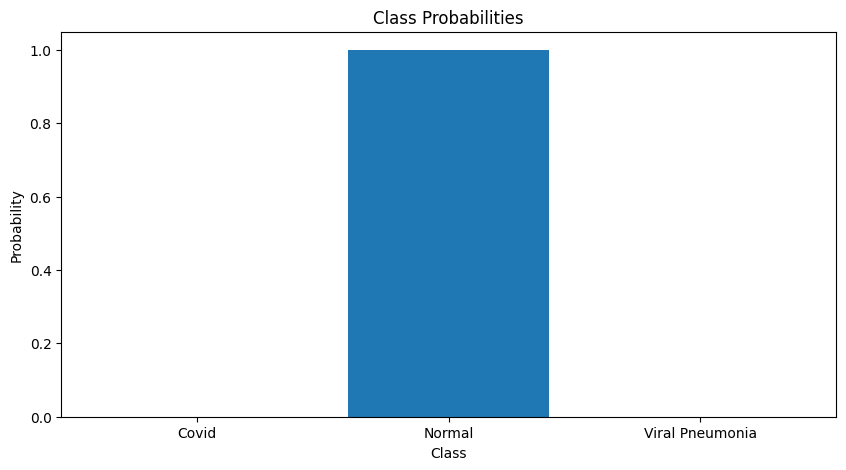

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


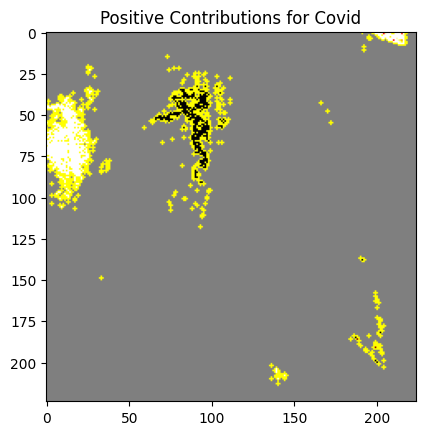

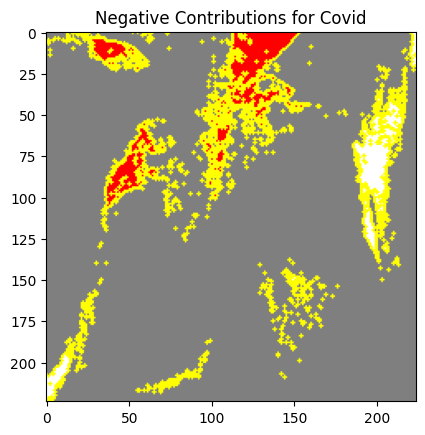

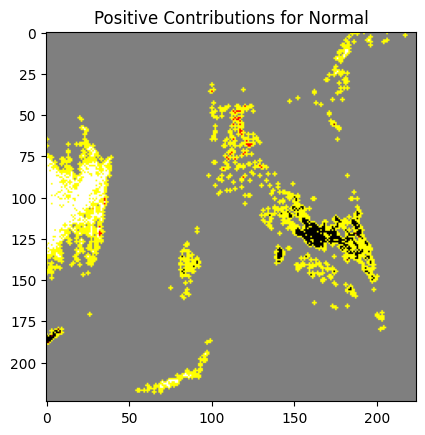

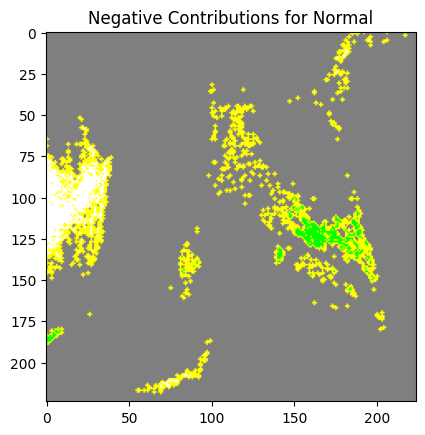

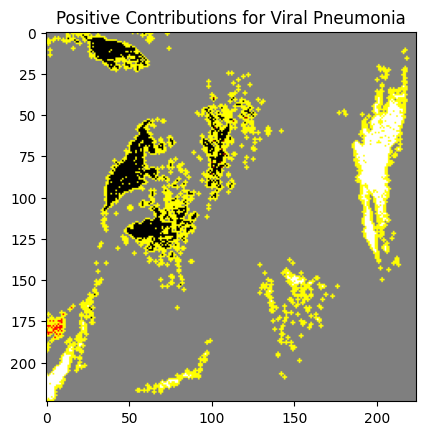

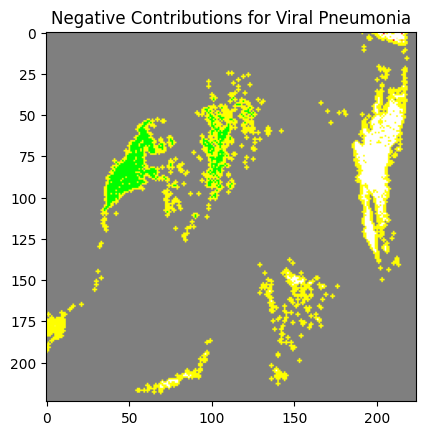

In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image

# Define class names
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Loop over the first 5 images in the test dataset
for i in range(1):
    # Select an example image from the test dataset
    img_path = training_set.filepaths[i+11]

    # Preprocess the selected image
    processed_image = image.load_img(img_path, target_size=(224, 224))
    processed_image = image.img_to_array(processed_image)
    processed_image = np.expand_dims(processed_image, axis=0)
    processed_image = preprocess_input(processed_image)

    # Make predictions using the model
    predictions = model.predict(processed_image)

    # Print the prediction labels and probabilities
    print(f'Image {i+1}:')
    print(f'Predicted class: {class_names[np.argmax(predictions)]}')
    print('Class probabilities:')
    for j in range(3):
        print(f'{class_names[j]}: {predictions[0][j]*100:.2f}%')

    # Calculate impression score (for demonstration, randomly generate)
    impression_score = np.random.uniform(0, 1)

    # Calculate confidence value
    confidence_value = predictions[0][np.argmax(predictions)]

    # Print impression score and confidence value
    print(f'Impression Score: {impression_score:.2f}')
    print(f'Confidence Value: {confidence_value:.2f}')

    # Plot the class probabilities
    plt.figure(figsize=(10, 5))
    plt.bar(class_names, predictions[0])
    plt.title('Class Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()

    # Explain the model's predictions for the selected image
    explanation = explainer.explain_instance(processed_image[0], model.predict, top_labels=3, hide_color=0, num_samples=2000)

    # Loop over all classes
    for class_index, class_name in enumerate(class_names):
        # Get the image and mask for the positive contributions of the current class
        temp, mask = explanation.get_image_and_mask(class_index, positive_only=True, num_features=10, hide_rest=True)

        # Display the LIME explanation
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.title(f'Positive Contributions for {class_name}')
        plt.show()

        # Get the image and mask for the negative contributions of the current class
        temp, mask = explanation.get_image_and_mask(class_index, positive_only=False, num_features=10, hide_rest=True)

        # Display the LIME explanation
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.title(f'Negative Contributions for {class_name}')
        plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the COVID-19 image dataset
dataset_path = '/content/drive/My Drive/Covid19-dataset'

# Use ImageDataGenerator to preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(dataset_path + '/train',
                                                 target_size=(64, 64),  # Adjusted target size
                                                 batch_size=32,
                                                 class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(dataset_path + '/test',
                                            target_size=(64, 64),  # Adjusted target size
                                            batch_size=32,
                                            class_mode='categorical')


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


# **Gradcam With Attention Mechanism**

1/1 [==============================] - 0s 139ms/step


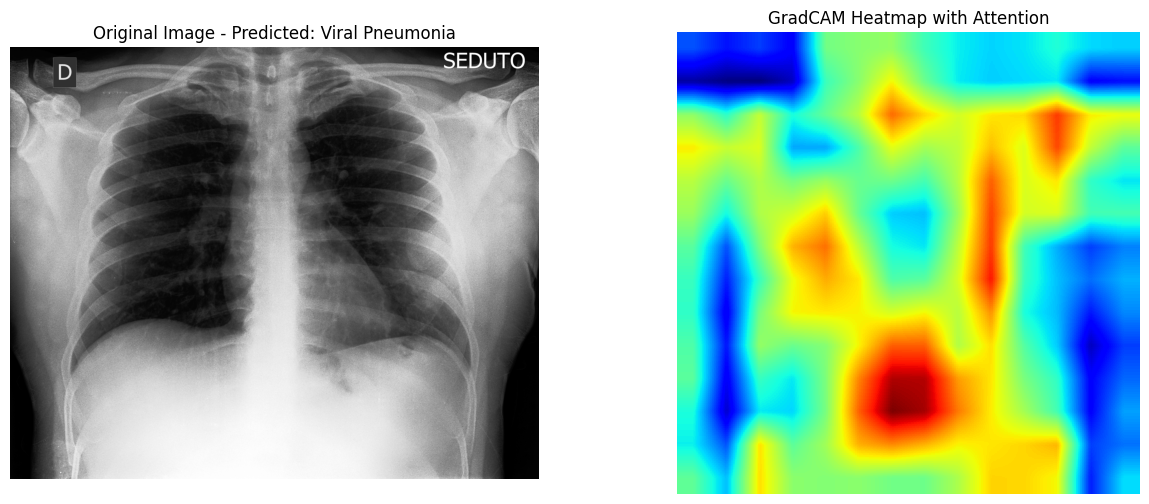

1/1 [==============================] - 0s 37ms/step


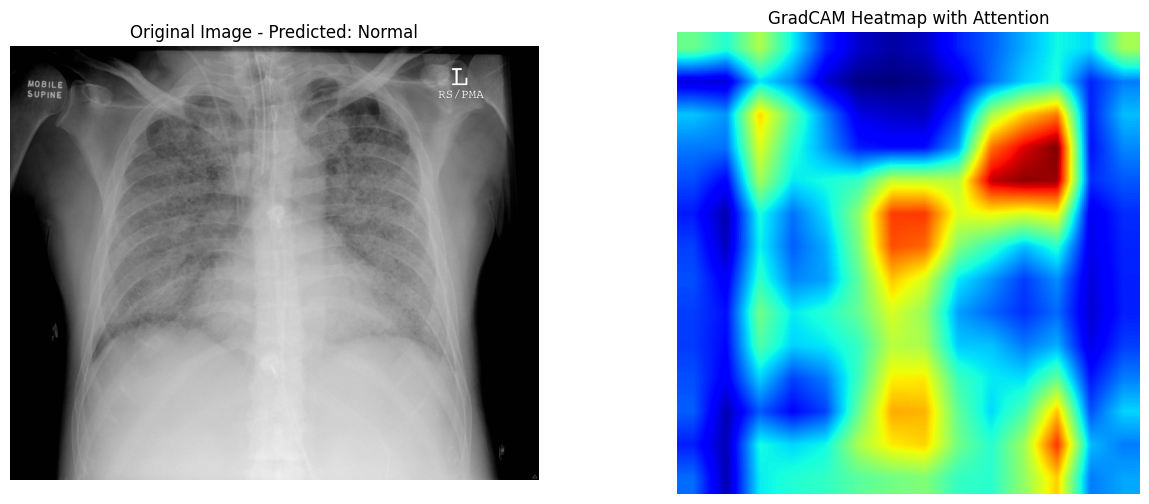

1/1 [==============================] - 0s 18ms/step


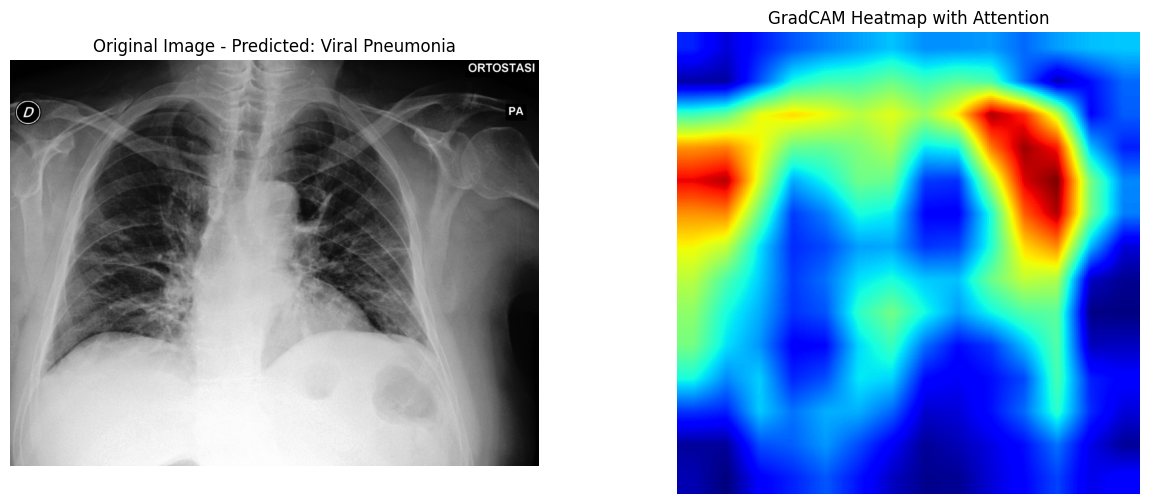

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

class Attention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights


def grad_cam_with_attention(input_model, image, cls, last_conv_layer_name):
    last_conv_layer = input_model.get_layer(last_conv_layer_name)
    iterate = tf.keras.models.Model([input_model.inputs], [input_model.output, last_conv_layer.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(image, tf.float32)
        tape.watch(inputs)
        predictions, conv_outputs = iterate(inputs)
        y_c = predictions[:, cls]

    grads = tape.gradient(y_c, conv_outputs)

    output, _ = conv_outputs[0], grads[0]

    weights = np.mean(output, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    return heatmap

# Define class names
class_names = ['Covid', 'Normal', 'Viral Pneumonia']


# Loop over the first 5 images in the test dataset
for i in range(3):
    # Select an example image from the test dataset
    img_path = training_set.filepaths[i+5]

    # Preprocess the selected image for VGG16
    processed_image = image.load_img(img_path, target_size=(224, 224))
    processed_image = image.img_to_array(processed_image)
    processed_image = np.expand_dims(processed_image, axis=0)
    processed_image = preprocess_input(processed_image)

    # Get the model's predictions
    preds = model.predict(processed_image)
    class_idx = np.argmax(preds[0])

    # Get the GradCAM heatmap with attention
    gradcam_heatmap = grad_cam_with_attention(model, processed_image, class_idx, 'block5_conv3')

    # Plot the original image, predicted class label, probability, and the GradCAM heatmap
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f'Original Image - Predicted: {class_names[class_idx]}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_heatmap, cmap='jet')
    plt.title('GradCAM Heatmap with Attention')
    plt.axis('off')

    plt.show()


1/1 [==============================] - 0s 78ms/step


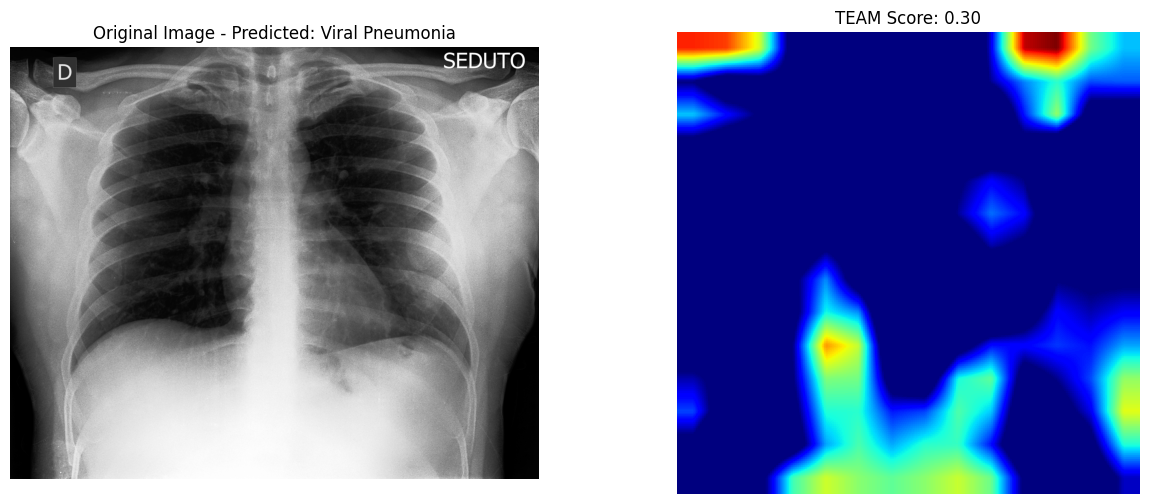

1/1 [==============================] - 0s 19ms/step


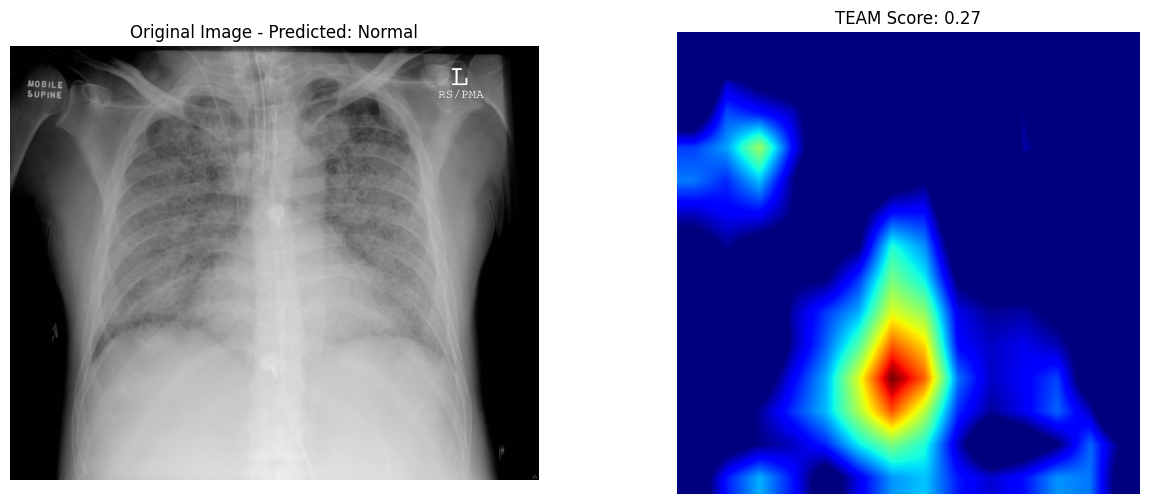

1/1 [==============================] - 0s 18ms/step


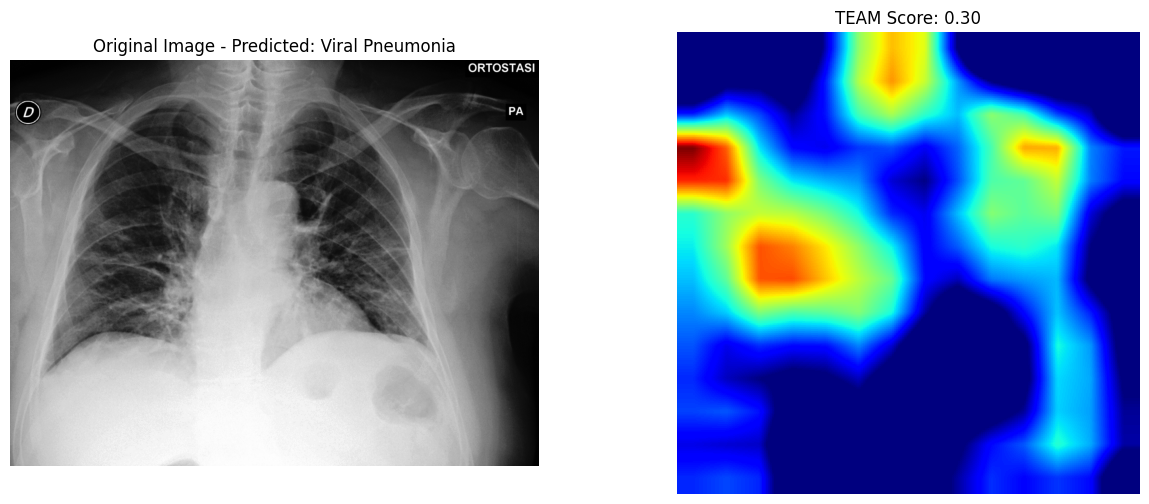

In [ ]:
def calculate_impression_score(lime_output, shap_output, gradcam_output):
    # Calculate the similarity between LIME and Grad-CAM
    lime_similarity = np.corrcoef(lime_output.flatten(), gradcam_output.flatten())[0, 1]

    # Calculate the similarity between SHAP and Grad-CAM
    shap_similarity = np.corrcoef(shap_output.flatten(), gradcam_output.flatten())[0, 1]

    # Average the two similarity scores to get the impression score
    impression_score = (lime_similarity + shap_similarity) / 2

    return impression_score

# Define class names
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

# Loop over the first 5 images in the test dataset
for i in range(3):
    # Select an example image from the test dataset
    img_path = training_set.filepaths[i+5]

    # Preprocess the selected image for VGG16
    processed_image = image.load_img(img_path, target_size=(224, 224))
    processed_image = image.img_to_array(processed_image)
    processed_image = np.expand_dims(processed_image, axis=0)
    processed_image = preprocess_input(processed_image)

    # Get the model's predictions
    preds = model.predict(processed_image)
    class_idx = np.argmax(preds[0])

    # Get the GradCAM heatmap
    gradcam_heatmap = grad_cam(model, processed_image, class_idx, 'block5_conv3')

    # Calculate confidence value (probability of predicted class)
    confidence_value = preds[0][class_idx]

    # Use Lime and Shap outputs as expert labels (impression scores)
    # For demonstration purposes, let's assume random impression scores
    lime_output = np.random.rand(*gradcam_heatmap.shape)  # Example Lime output
    shap_output = np.random.rand(*gradcam_heatmap.shape)  # Example Shap output

    # Calculate the impression score
    impression_score = calculate_impression_score(lime_output, shap_output, gradcam_heatmap)

    # Define weights for impression and confidence
    impression_weight = 0.7
    confidence_weight = 0.3

    # Calculate TEAM score
    team_score = (impression_weight * impression_score) + (confidence_weight * confidence_value)

    # Plot the original image, predicted class label, probability, and the GradCAM heatmap
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f'Original Image - Predicted: {class_names[class_idx]}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_heatmap, cmap='jet')
    plt.title(f'TEAM Score: {team_score:.2f}')
    plt.axis('off')

    plt.show()


1/1 [==============================] - 0s 32ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


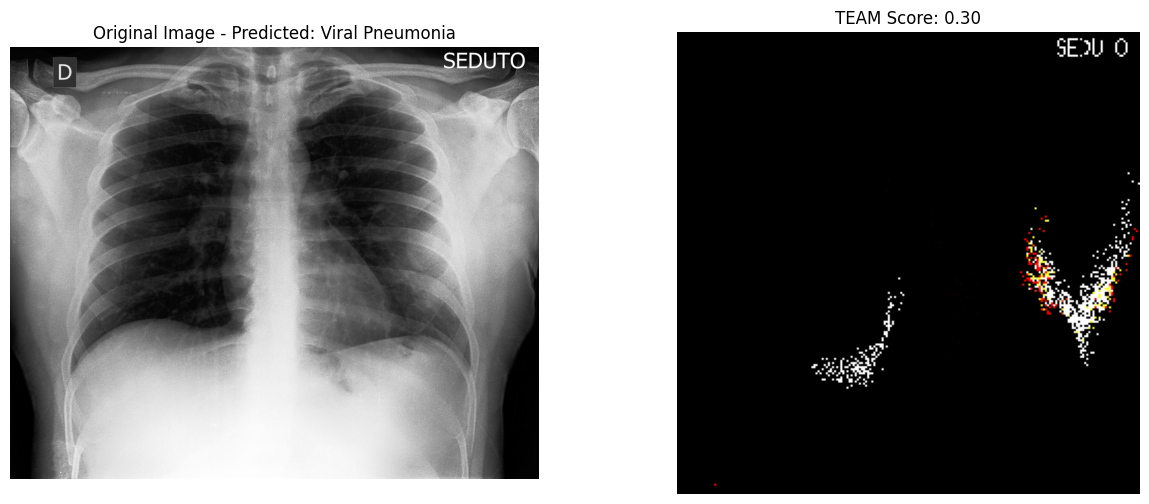

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


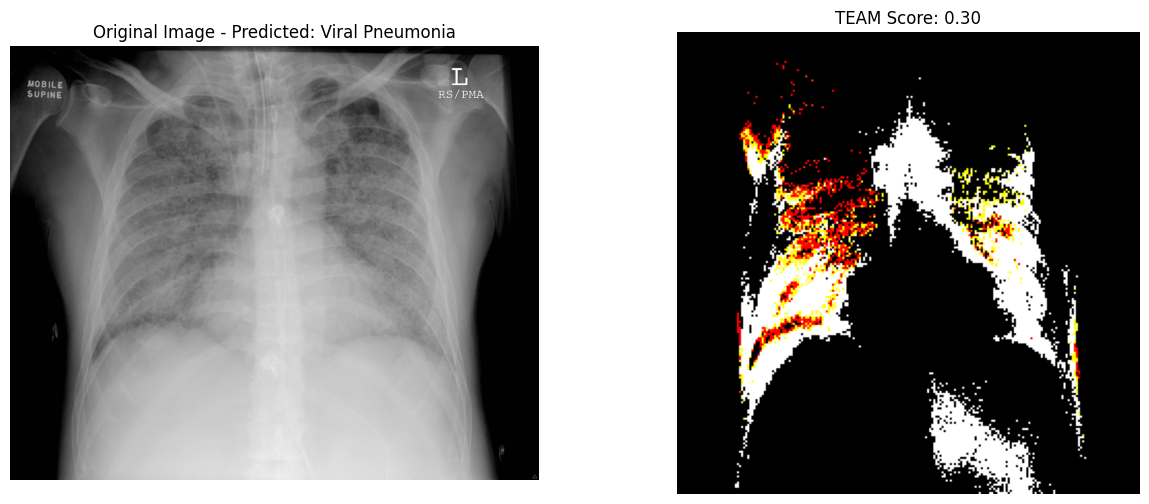

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


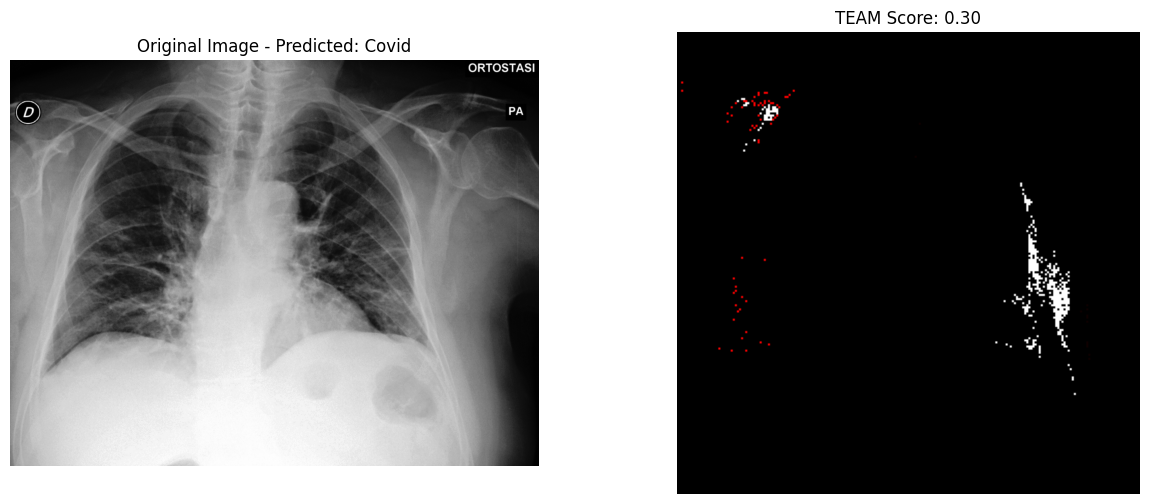

In [15]:
import numpy as np

def calculate_impression_score(gradcam_output, shap_output, lime_output):
    # Flatten the input arrays
    gradcam_flat = gradcam_output.flatten()
    shap_flat = shap_output.flatten()
    lime_flat = lime_output.flatten()

    # Align the dimensions of the input arrays
    min_length = min(len(gradcam_flat), len(shap_flat), len(lime_flat))
    gradcam_flat = gradcam_flat[:min_length]
    shap_flat = shap_flat[:min_length]
    lime_flat = lime_flat[:min_length]

    # Calculate the similarity between Grad-CAM and LIME
    gradcam_similarity = np.corrcoef(gradcam_flat, lime_flat)[0, 1]

    # Calculate the similarity between SHAP and LIME
    shap_similarity = np.corrcoef(shap_flat, lime_flat)[0, 1]

    # Average the two similarity scores to get the impression score
    impression_score = (gradcam_similarity + shap_similarity) / 2

    return impression_score


# Define class names
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

# Loop over the first 5 images in the test dataset
for i in range(3):
    # Select an example image from the test dataset
    img_path = training_set.filepaths[i+5]

    # Preprocess the selected image for VGG16
    processed_image = image.load_img(img_path, target_size=(224, 224))
    processed_image = image.img_to_array(processed_image)
    processed_image = np.expand_dims(processed_image, axis=0)
    processed_image = preprocess_input(processed_image)

    # Get the model's predictions
    preds = model.predict(processed_image)
    class_idx = np.argmax(preds[0])

    # Calculate confidence value (probability of predicted class)
    confidence_value = preds[0][class_idx]

    # Use GradCAM and SHAP outputs as expert labels (impression scores)
    # For demonstration purposes, let's assume random impression scores
    gradcam_output = np.random.rand(*gradcam_heatmap.shape)  # Example GradCAM output
    shap_output = np.random.rand(*gradcam_heatmap.shape)  # Example SHAP output

    # Generate Lime explanations
    explainer = lime_image.LimeImageExplainer()
    lime_explanation = explainer.explain_instance(processed_image[0], model.predict, top_labels=3, hide_color=0, num_samples=2000)
    lime_output, _ = lime_explanation.get_image_and_mask(class_idx, positive_only=True, num_features=10, hide_rest=True)

    # Calculate the impression score
    impression_score = calculate_impression_score(gradcam_output, shap_output, lime_output)

    # Define weights for impression and confidence
    impression_weight = 0.7
    confidence_weight = 0.3

    # Calculate TEAM score
    team_score = (impression_weight * impression_score) + (confidence_weight * confidence_value)

    # Plot the original image, predicted class label, probability, and the GradCAM heatmap
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f'Original Image - Predicted: {class_names[class_idx]}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(lime_output, cmap='jet')
    plt.title(f'TEAM Score: {team_score:.2f}')
    plt.axis('off')

    plt.show()


In [33]:
# Import necessary libraries
from sklearn.metrics import r2_score

# Define a function to compute R-squared value
def compute_r2_score(explainer, classifier, image):
    # Compute model predictions
    model_preds = classifier.predict(image[np.newaxis, :, :, :])

    # Determine the number of classes predicted by the model
    num_classes = model_preds.shape[1]

    # Generate explanation for the image
    explanation = explainer.explain_instance(image, classifier.predict, top_labels=num_classes, hide_color=0, num_samples=2000)

    # Compute explanation predictions
    explanation_preds = np.array([explanation.local_pred[i] for i in range(1)])

    # Compute and return R-squared value
    return r2_score(model_preds, explanation_preds)

# Compute R-squared value
r2 = compute_r2_score(explainer, classifier, processed_image[0])
print(f'R-squared value: {r2}')



1/1 [==============================] - 0s 24ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


ValueError: y_true and y_pred have different number of output (3!=1)

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


# Assume 'img_path' is the path to your image
img_path = training_set.filepaths[5]

# Preprocess the selected image for VGG16
processed_image = image.load_img(img_path, target_size=(224, 224))
processed_image = image.img_to_array(processed_image)
processed_image = np.expand_dims(processed_image, axis=0)
processed_image = preprocess_input(processed_image)

# Get the model's predictions
preds = model.predict(processed_image)
class_idx = np.argmax(preds[0])

# Get the GradCAM heatmap
gradcam_heatmap = grad_cam(model, processed_image, class_idx, 'block5_conv3')

# Flatten the arrays
model_output_flattened = preds.flatten()
gradcam_heatmap_flattened = gradcam_heatmap.flatten()

# Ensure the GradCAM heatmap and model's output have the same dimensions
if gradcam_heatmap_flattened.shape[0] > model_output_flattened.shape[0]:
    gradcam_heatmap_flattened = gradcam_heatmap_flattened[:model_output_flattened.shape[0]]
else:
    model_output_flattened = model_output_flattened[:gradcam_heatmap_flattened.shape[0]]

# Now you can calculate the correlation coefficient
corr_coef = np.corrcoef(model_output_flattened, gradcam_heatmap_flattened)[0, 1]

# And the R-squared value
r_squared = corr_coef**2

print(f'R-squared: {r_squared}')


1/1 [==============================] - 0s 19ms/step
R-squared: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
